In [16]:
import pandas as pd
import numpy as np

In [17]:
data271 = pd.read_csv('DATA/crowd/player=271/month=2020-11.csv',
                         names=['oidColumn', 'addedOnDate', 'mac', 'radarId', 'face', 'admTypeBit', 'addedOnTick', 'frameOid'])

In [18]:
data271

,oidColumn,addedOnDate,mac,radarId,face,admTypeBit,addedOnTick,frameOid
0,23979117498,01.11.2020 0:00:00,00:27:15:F1:F7:47,10.154.0.22,B,0,1604190828000,5.088037e+09
1,23979117499,01.11.2020 0:00:00,00:27:15:F1:F7:47,10.154.0.22,B,0,1604190843000,5.088037e+09
2,23979117500,01.11.2020 0:00:00,84:24:8D:59:E8:F0,10.154.0.22,B,0,1604190845000,5.088037e+09
3,23979119199,01.11.2020 0:00:00,12:35:B8:A5:74:43,10.154.0.22,B,1,1604190975000,5.088033e+09
4,23979119200,01.11.2020 0:00:00,20:54:FA:BA:C6:55,10.154.0.22,B,0,1604191008000,5.088033e+09
...,...,...,...,...,...,...,...,...
444538,26207252192,30.11.2020 0:00:00,95:E8:3D:D8:3A:6E,10.154.0.22,A,1,1606780617000,5.384932e+09
444539,26207252194,30.11.2020 0:00:00,A7:B6:05:F5:74:05,10.154.0.22,A,1,1606780620000,5.384932e+09
444540,26207253582,30.11.2020 0:00:00,9A:F6:21:88:7E:5C,10.154.0.22,A,1,1606780626000,5.384932e+09
444541,26207253584,30.11.2020 0:00:00,D8:68:C3:C3:71:A7,10.154.0.22,A,0,1606780654000,5.384932e+09


In [19]:
data271.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444543 entries, 0 to 444542
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   oidColumn    444543 non-null  int64  
 1   addedOnDate  444543 non-null  object 
 2   mac          444543 non-null  object 
 3   radarId      444543 non-null  object 
 4   face         444543 non-null  object 
 5   admTypeBit   444543 non-null  int64  
 6   addedOnTick  444543 non-null  int64  
 7   frameOid     444061 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 27.1+ MB


In [20]:
# Объединим данные за несколько месяцев с одного билборда
months = ['0-11', '0-12', '1-1']
pieces = []
columns = ['oidColumn', 'addedOnDate', 'mac', 'radarId', 'face', 'admTypeBit', 'addedOnTick', 'frameOid']
for month in months:
    path = 'DATA/crowd/player=271/month=202%s.csv' % month
    frame = pd.read_csv(path, names=columns)
    frame['month'] = month
    pieces.append(frame)
# Собрать все данные в один объект DataFrame
names = pd.concat(pieces, ignore_index=True)
names = names.sort_values('addedOnTick', ignore_index=True)

In [21]:
names

,oidColumn,addedOnDate,mac,radarId,face,admTypeBit,addedOnTick,frameOid,month
0,23978327277,01.11.2020 0:00:00,DA:A1:19:FA:02:AD,10.154.0.22,A,1,1604188835000,5.088036e+09,0-11
1,23978432711,01.11.2020 0:00:00,84:24:8D:59:E8:F0,10.154.0.22,B,0,1604188843000,5.088036e+09,0-11
2,23978327667,01.11.2020 0:00:00,D6:B7:61:82:98:66,10.154.0.22,A,1,1604188850000,5.088035e+09,0-11
3,23978327668,01.11.2020 0:00:00,D6:B7:61:82:98:66,10.154.0.22,A,1,1604188852000,5.088035e+09,0-11
4,23978327669,01.11.2020 0:00:00,D6:B7:61:82:98:66,10.154.0.22,A,1,1604188862000,5.088035e+09,0-11
...,...,...,...,...,...,...,...,...,...
1097843,30169811665,16.01.2021 0:00:00,6A:C4:B2:21:6C:85,10.154.0.22,B,1,1610779168000,5.843932e+09,1-1
1097844,30169784946,16.01.2021 0:00:00,76:8B:06:24:C0:15,10.154.0.22,A,1,1610779241000,5.843929e+09,1-1
1097845,30169784949,16.01.2021 0:00:00,A0:41:47:90:61:27,10.154.0.22,A,0,1610779258000,5.843929e+09,1-1
1097846,30169784950,16.01.2021 0:00:00,A0:41:47:90:61:27,10.154.0.22,A,0,1610779277000,5.843929e+09,1-1


In [22]:
total_ = pd.pivot_table(names,
                        index ='addedOnDate', 
                        columns='admTypeBit', 
                        aggfunc=np.sum)

In [23]:
total_

addedOnTick                         frameOid  \
admTypeBit                         0                  1             0   
addedOnDate                                                             
01.01.2021 0:00:00   515028456076000    799902837833000  1.822482e+12   
01.11.2020 0:00:00  4146927203585000  13177102756743000  1.314337e+13   
01.12.2020 0:00:00  8114380049350000  20186336311983000  2.716305e+13   
02.11.2020 0:00:00  5895821233741000  17304026647075000  1.867737e+13   
02.12.2020 0:00:00  7007697969286000  20806128160141000  2.349831e+13   
...                              ...                ...           ...   
29.11.2020 0:00:00  5314781069684000  14882339609294000  1.772612e+13   
29.12.2020 0:00:00  6139242270624000  20591781298003000  2.159253e+13   
30.11.2020 0:00:00  7697803993862000  17826586477761000  2.573975e+13   
30.12.2020 0:00:00  6926502251681000  21233321390954000  2.441677e+13   
31.12.2020 0:00:00  4794429445676000  13462708135837000  1.689709e+13   

                                        oidColumn                   
admTypeBit                     1                0                1  
addedOnDate                                                         
01.01.2021 0:00:00  2.823224e+12    9236857571171   14345512017617  
01.11.2020 0:00:00  4.175253e+13   62056563811473  197169046152618  
01.12.2020 0:00:00  6.757853e+13  132476939750493  329578022505900  
02.11.2020 0:00:00  5.491981e+13   88463869461152  259629799148094  
02.12.2020 0:00:00  6.975408e+13  114812037349114  340845745991483  
...                          ...              ...              ...  
29.11.2020 0:00:00  4.963394e+13   86330929889985  241734033055652  
29.12.2020 0:00:00  7.244430e+13  109023939182803  365639296864771  
30.11.2020 0:00:00  5.952625e+13  125277560487071  290131996993420  
30.12.2020 0:00:00  7.483529e+13  123471619149359  378481862894994  
31.12.2020 0:00:00  4.756275e+13   85815549256512  240968555709904  

[76 rows x 6 columns]

<AxesSubplot:title={'center':'Частота фиксации мак-адресов'}, xlabel='addedOnDate'>

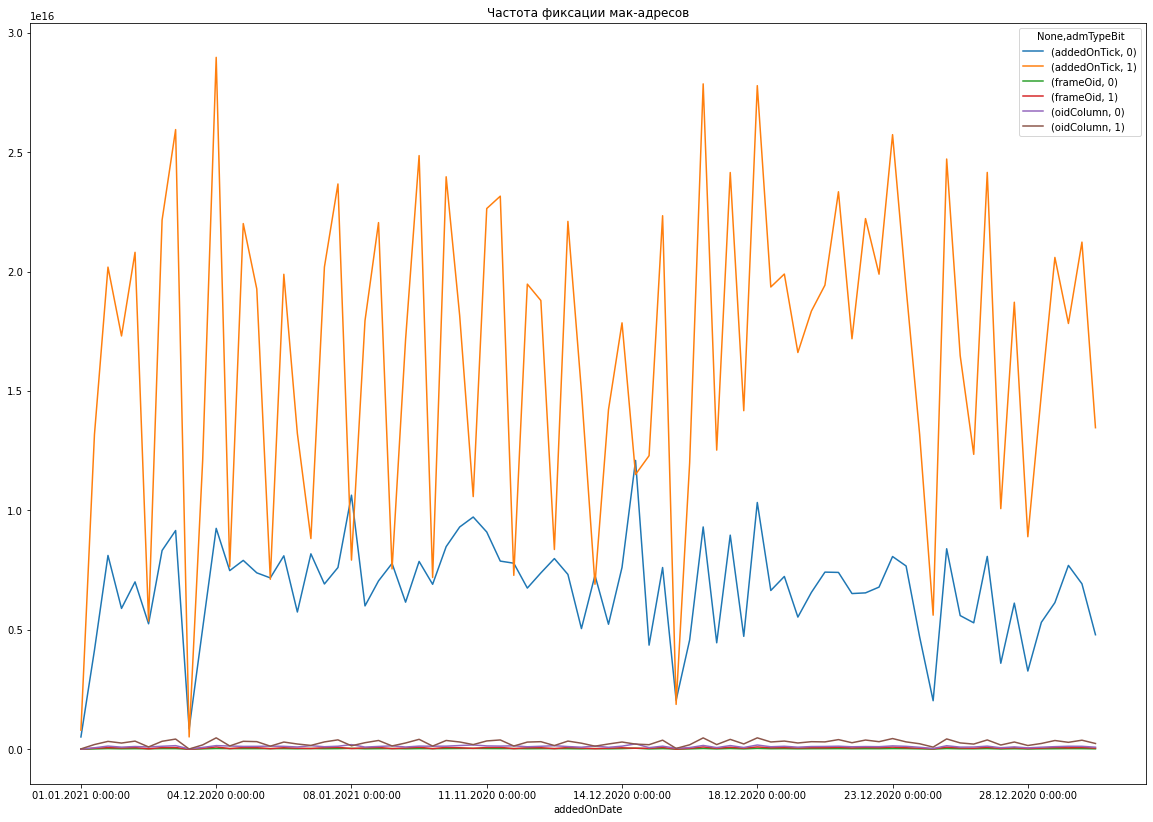

In [24]:
import datetime
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt
text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
total_.plot(figsize=(20, 14), title='Частота фиксации мак-адресов')


In [30]:
total_1 = pd.pivot_table(names,
                        index ='addedOnTick', 
                        columns='admTypeBit', 
                        aggfunc=np.sum)

In [31]:
start_time = total_1.iloc[[0]].index[0]
end_time = total_1.iloc[[-1]].index[0]
size_dataframe = len(total_1.index)

interactive(children=(IntSlider(value=438435, description='start_date', max=876870), IntSlider(value=438435, d…

DatePicker(value=None, description='Pick a Date')

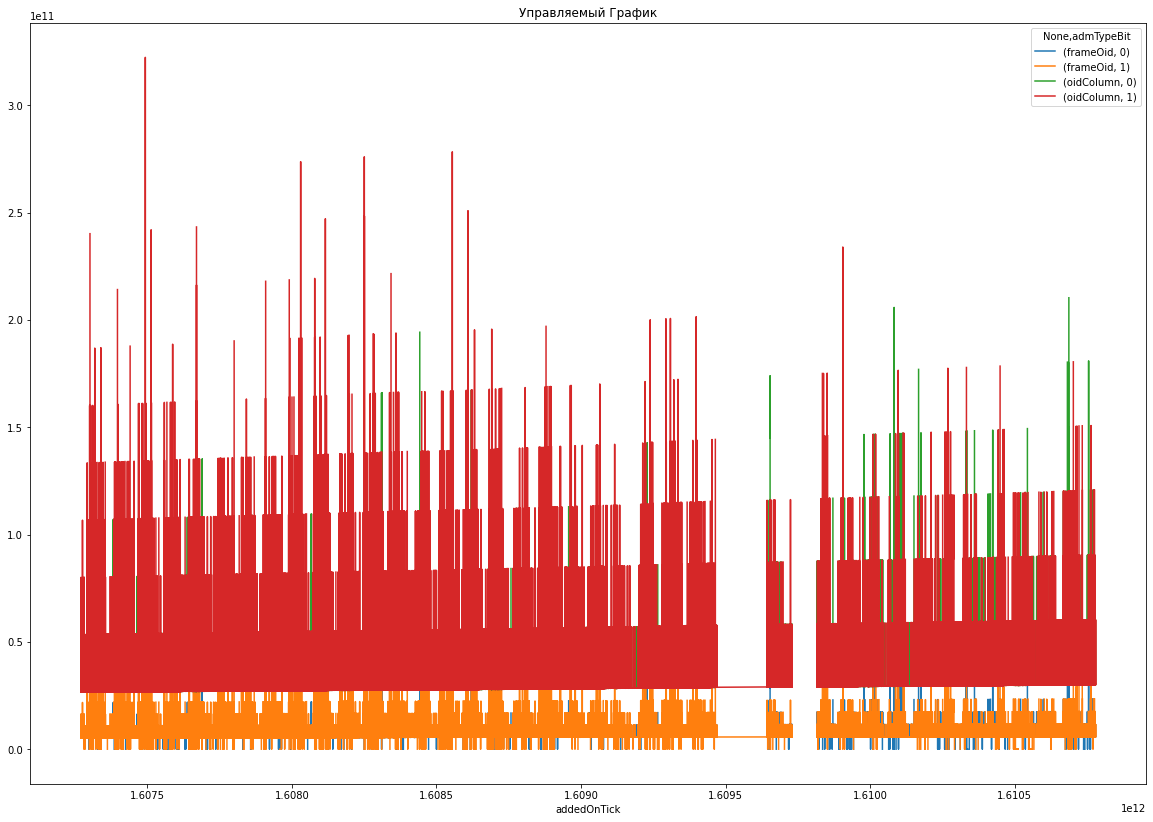

In [60]:
import datetime
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt

# # interactive
# #from IPython.html import widgets
from ipywidgets import widgets
@widgets.interact
def f(start_date=(0, size_dataframe-1, 1), scale=(1, size_dataframe-1, 1), step = (1, 1000, 10)):
    date_readable = (pd.to_datetime(
    [total_1.iloc[[start_date]].index[0]],
    unit="ms",))[0]
    period_readable = (pd.to_datetime(
    [total_1.iloc[[scale]].index[0]],
    unit="ms",))[0] - (pd.to_datetime(
    [total_1.iloc[[0]].index[0]],
    unit="ms",))[0]
    endpoint = start_date + scale
    if endpoint - 1 >= size_dataframe:
        endpoint = size_dataframe-1
    data_cut = total_1.iloc[start_date:endpoint]
    data_cut.plot(figsize=(20, 14), title='Управляемый График')
    return (start_date, scale, step, date_readable, period_readable,
           )

widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)